# Problem Statement and Description

In the city of New York, there are a lot of places for the residents to go out and eat, and there are people who would like to take the opportunity of serving such people by opening his/her own restraunt. Food business always thrives on the quality of the food served, variety of the dishes and area in which it is operting. But, in large cities like New York, it could be diificult to decide where should one open his new restraunt, after which he would have to decide which cuisines to offer and many more things. No worries, these problems could be easily solved by using the data, and applying certain tools on it.

So, the Final Problem is to-

1. Decide where to open a restraunt
2. Which cuisine is the more famous in the area

# Data Requirements

Since we have established a problem, we have to go ahead and decide what kinds of data would be needed. To solve the problem for deciding places where people usually go to eat, we have to determine that by clustering the neighborhoods into diiferent categories, and then determine which could be a more appropriate place to operate at. Then we would need the 

Important links:

1. https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City
2. https://cocl.us/new_york_dataset
3. https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

These are the sources used in the analysis and finding optimum place for a person to open a restaraunt.

Apart form this data, Foursquare API will be used to gather data regarding the places in each neighborhood, so that a more detailed and thorough analysis could be conducted and proper findings can be shown.

In [122]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
url="https://cocl.us/new_york_dataset"

#### Load and explore the data

In [9]:
req=requests.get(url)

Next, let's load the data.

In [19]:
newyork_data = json.loads(req.text)

In [21]:
newyork_data['features'][0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Creating DataFrame of necessary information

In [33]:
data=newyork_data['features']
res_df={'Neighborhood':[],'Borough':[],'Latitude':[],'Longitude':[]}
for asset in data:
    res_df['Neighborhood'].append(asset['properties']['name'])
    res_df['Borough'].append(asset['properties']['borough'])
    res_df['Latitude'].append(asset['geometry']['coordinates'][0])
    res_df['Longitude'].append(asset['geometry']['coordinates'][1])

neighborhoods=pd.DataFrame(res_df)

neighborhoods

,Neighborhood,Borough,Latitude,Longitude
0,Wakefield,Bronx,-73.847201,40.894705
1,Co-op City,Bronx,-73.829939,40.874294
2,Eastchester,Bronx,-73.827806,40.887556
3,Fieldston,Bronx,-73.905643,40.895437
4,Riverdale,Bronx,-73.912585,40.890834
5,Kingsbridge,Bronx,-73.902818,40.881687
6,Marble Hill,Manhattan,-73.910660,40.876551
7,Woodlawn,Bronx,-73.867315,40.898273
8,Norwood,Bronx,-73.879391,40.877224
9,Williamsbridge,Bronx,-73.857446,40.881039


So, our final DataFrame has 306 rows, i.e. 306 neighborhoods to scan analyze.

In [35]:
", ".join(neighborhoods['Borough'].unique())

'Bronx, Manhattan, Brooklyn, Queens, Staten Island'

These are the Boroughs in New York City

In [166]:
neighborhoods['Borough'].value_counts()

Queens           81
Brooklyn         70
Staten Island    63
Bronx            52
Manhattan        40
Name: Borough, dtype: int64

These are the number of Neighborhoods in each Borough of New York City

In [36]:
from bs4 import BeautifulSoup as bs

Now Scrapping a Wikipedia Website for creating WordClouds for visualising famous cuisines in the Boroughs

In [162]:
url2="https://en.wikipedia.org/wiki/Cuisine_of_New_York_City#The_Bronx"
req=requests.get(url2)

soup=bs(req.text,'html.parser')

check={}
for bronx in neighborhoods['Borough'].unique():
    name="_"+bronx
    if " " in bronx:
        name=name.replace(" ","_")
    check[name]=""

check

{'_Bronx': '',
 '_Manhattan': '',
 '_Brooklyn': '',
 '_Queens': '',
 '_Staten_Island': ''}

In [163]:
for line in soup('li'):
    f=0
    for neigh in check.keys():
        if neigh in str(line):
            if str(str(line).split('</a>')[1]).startswith(" "):
                out=str(line).split('</a>')[1]
                out=out[2:out.find("<")]
                check[neigh]+=out

check

{'_Bronx': ' Mexican, Puerto Rican, Dominican, Korean (on 204th St.) Italian, Albanian (also known as "Arthur Avenue," "Little Italy") Italian, Seafood Italian, Albanian Filipino (formerly Irish, less so today) Jewish Puerto Rican, Dominican Jamaican, West Indian IrishBronx County)',
 '_Manhattan': ' Chinese and Vietnamese Japanese, Korean, Indian and Ukrainian Korean Australian Italian Puerto Rican, Jewish, Italian, and Latin American Indian, Pakistani and Bangladeshi Jewish, Chinese-Latino Dominican, Puerto Rican, Italian and Jewish German, Czech, Hungarian',
 '_Brooklyn': ' Irish, Italian, Greek, Turkish, Lebanese, Palestinian, Yemeni and other Arabic Jewish, Italian, Mexican, Chinese Italian Jamaican, West Indian, and Jewish Jamaican, Haitian, and Creole Polish and Ukrainian Bengali, Pakistani, Mexican, Uzbek, and Polish Jewish, Italian, Russian, and Pakistani Italian, Irish, French, and Puerto Rican (formerly) Puerto Rican, African-American, and Italian Seafood, Chinese, Russian, 

Now that data is collected and cleaned, we can now create WordClouds of cuisines of each neighborhood

In [152]:
from wordcloud import WordCloud

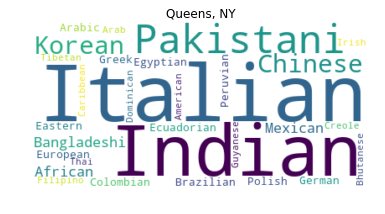

In [171]:
Q_NY= WordCloud(background_color='white')
Q_NY.generate(check["_Queens"])

plt.imshow(Q_NY, interpolation='bilinear')
plt.axis('off')
plt.title('Queens, NY')
plt.show()

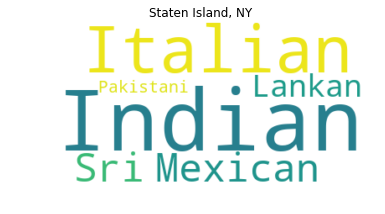

In [172]:
ST_NY= WordCloud(background_color='white')
ST_NY.generate(check['_Staten_Island'])
plt.imshow(ST_NY, interpolation='bilinear')
plt.axis('off')
plt.title('Staten Island, NY')
plt.show()

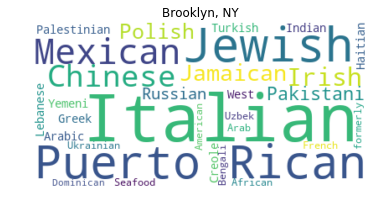

In [173]:
B_NY= WordCloud(background_color='white')
B_NY.generate(check['_Brooklyn'])
plt.imshow(B_NY, interpolation='bilinear')
plt.axis('off')
plt.title('Brooklyn, NY')
plt.show()

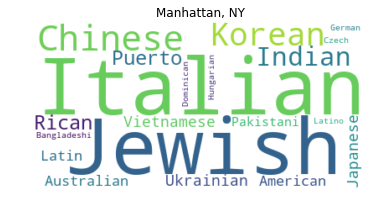

In [174]:
M_NY= WordCloud(background_color='white')
M_NY.generate(check['_Manhattan'])
plt.imshow(M_NY, interpolation='bilinear')
plt.axis('off')
plt.title('Manhattan, NY')
plt.show()

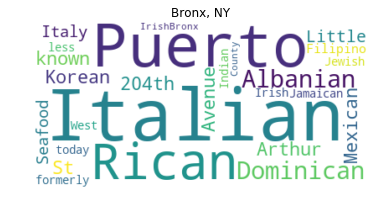

In [175]:
Br_NY= WordCloud(background_color='white')
Br_NY.generate(check['_Bronx'])
plt.imshow(Br_NY, interpolation='bilinear')
plt.axis('off')
plt.title('Bronx, NY')
plt.show()

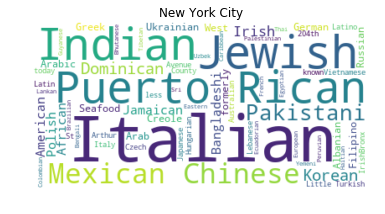

In [176]:
NY= WordCloud(background_color='white')
all_data=""
for key in check.keys():
    all_data+=check[key]

NY.generate(all_data)
plt.imshow(NY, interpolation='bilinear')
plt.axis('off')
plt.title('New York City')
plt.show()

This is all the data used for names of the neighborhoods, further FourSquare API is going to be used to gather data regarding places in each neighborhood